In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from sklearn import metrics
import seaborn as ss
import os
from os import listdir

In [ ]:
from zipfile import ZipFile

# Example: your file is named 'archive(2).zip'
file_name = "/content/new10.zip"

# Extract all contents to the current directory
with ZipFile(file_name, 'r') as zip_ref:
    zip_ref.extractall('bdsl06')

print("✅ Unzipping complete! Files are inside the 'bdsl47' folder.")

✅ Unzipping complete! Files are inside the 'bdsl47' folder.


# **Sign Alphabets**

### User 01

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LeakyReLU
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from keras.callbacks import CSVLogger
import os

In [ ]:

new_words_path = "/content/bdsl06/new10/"

labels_map = {
    "Bad": 0, "Beautiful": 1, "Good": 2,
    "Me": 3, "My": 4, "You": 5,"Color": 6, "Promise": 7, "Salam": 8, "They": 9, "Think": 10
}

In [ ]:

print("Loading 11-Word Data...")
data_list = []
label_list = []

for word, label_id in labels_map.items():
    filename = f"Word_{word}_63points.csv"
    file_path = os.path.join(new_words_path, filename)

    if os.path.exists(file_path):
        df = pd.read_csv(file_path)
        if len(df) > 0:
            # Grab features (Col 1-63)
            features = df.iloc[:, 1:64].values
            # Force Labels to be 0-5
            labels = np.full(len(features), label_id)

            data_list.append(features)
            label_list.append(labels)
            print(f"  Loaded {word}: {len(features)} samples")

if not data_list:
    raise SystemExit("❌ No data found! Check your folder path.")

Loading 11-Word Data...
  Loaded Bad: 93 samples
  Loaded Beautiful: 121 samples
  Loaded Good: 108 samples
  Loaded Me: 42 samples
  Loaded My: 647 samples
  Loaded You: 118 samples
  Loaded Color: 568 samples
  Loaded Promise: 534 samples
  Loaded Salam: 589 samples
  Loaded They: 579 samples
  Loaded Think: 560 samples


In [ ]:
X = np.vstack(data_list)
y = np.concatenate(label_list)


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Split
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


model = Sequential()
model.add(Dense(64, input_shape=(63,)))
model.add(Dense(128))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(64))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.2))

# Output: 11 Neurons
model.add(Dense(11, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [ ]:

print("\nStarting Training...")

csv_logger = CSVLogger('log_words_only.csv', append=True, separator=';')

model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100, batch_size=32, callbacks=[csv_logger])


Starting Training...
Epoch 1/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - accuracy: 0.3164 - loss: 2.0775 - val_accuracy: 0.6742 - val_loss: 1.1628
Epoch 2/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6858 - loss: 1.0445 - val_accuracy: 0.7929 - val_loss: 0.6570
Epoch 3/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8126 - loss: 0.6473 - val_accuracy: 0.8434 - val_loss: 0.4696
Epoch 4/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8501 - loss: 0.4629 - val_accuracy: 0.8826 - val_loss: 0.3722
Epoch 5/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8963 - loss: 0.3688 - val_accuracy: 0.8977 - val_loss: 0.3310
Epoch 6/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9135 - loss: 0.3056 - val_accuracy: 0.9129 - val_loss: 0.2758
Epoch 7/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9288 - loss: 0.2601 - val_accuracy: 0.9242 - val_loss: 0.2470
Epoch 8/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9320 - loss: 0.2361 - v

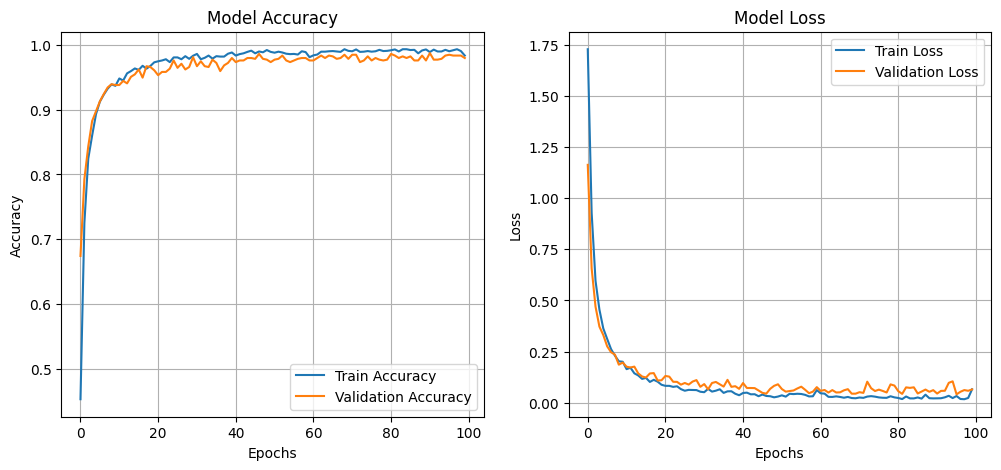

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step


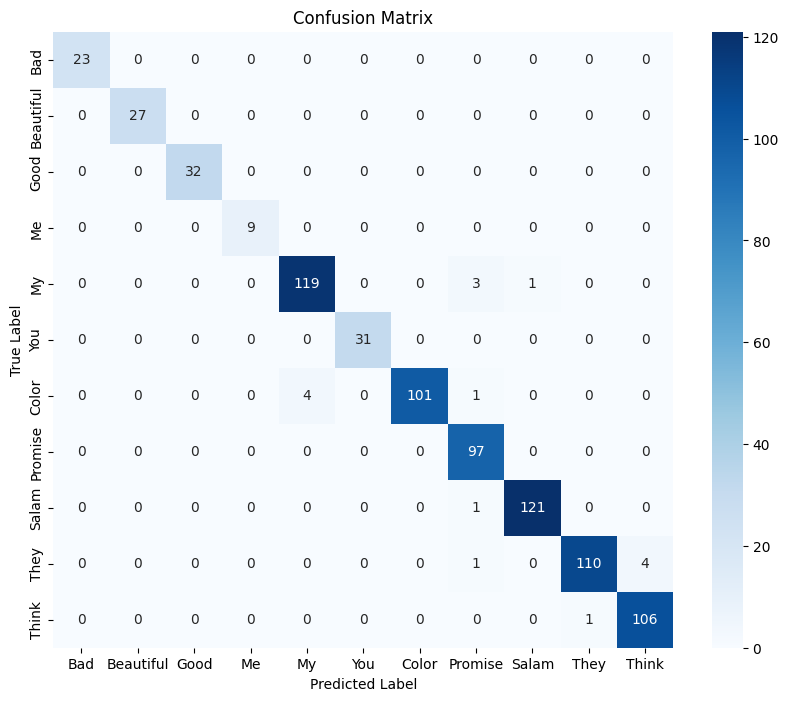

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix

# ==========================================
# 2. Accuracy Graph
# ==========================================
# This reads the log file created by your CSVLogger callback
try:
    log_data = pd.read_csv('log_words_only.csv', sep=';')

    plt.figure(figsize=(12, 5))

    # Plot Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(log_data['accuracy'], label='Train Accuracy')
    plt.plot(log_data['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    # Plot Loss (Optional but helpful)
    plt.subplot(1, 2, 2)
    plt.plot(log_data['loss'], label='Train Loss')
    plt.plot(log_data['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    plt.show()

except FileNotFoundError:
    print("Error: 'log_words_only.csv' not found. Make sure you ran the training cell (model.fit) first.")

# ==========================================
# 3. Confusion Matrix
# ==========================================
# Get predictions on the test set
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Get class names from your existing labels_map
class_names = list(labels_map.keys())

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:

model.save("Finalbdsl11_words.h5")


In [ ]:

print("\nvvv COPY THIS FOR YOUR WORD CLIENT vvv")
print("MEANS =", list(scaler.mean_))
print("SCALES =", list(scaler.scale_))


vvv COPY THIS FOR YOUR WORD CLIENT vvv
MEANS = [np.float64(0.47006019444934105), np.float64(0.5165959440652239), np.float64(1.2170209920939631e-07), np.float64(0.4685120926467393), np.float64(0.5027695480275198), np.float64(-0.011181679841586007), np.float64(0.46663440094906794), np.float64(0.48614866413439956), np.float64(-0.019510935749891285), np.float64(0.4642780892646956), np.float64(0.47437062126517304), np.float64(-0.027371546274358144), np.float64(0.4613413314578833), np.float64(0.46638515959961885), np.float64(-0.034287961660568626), np.float64(0.46231324631637283), np.float64(0.4667927362355511), np.float64(-0.019283451704720407), np.float64(0.46000446129209144), np.float64(0.450102198732514), np.float64(-0.034370238296913234), np.float64(0.46031378795443795), np.float64(0.44209661246496945), np.float64(-0.04266048527441943), np.float64(0.46055047387153825), np.float64(0.4362583536823011), np.float64(-0.04740474852587782), np.float64(0.4624830076766128), np.float64(0.4706372

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         4,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 11)             │           715 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 64,163 (250.64 KB)

 Trainable params: 21,387 (83.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 42,776 (167.10 KB)